# **K-Means**

Implementation of the K-MEANS algorithm for classification of database data:
 	
http://archive.ics.uci.edu/ml/   





# **Glass Identification Data Set**

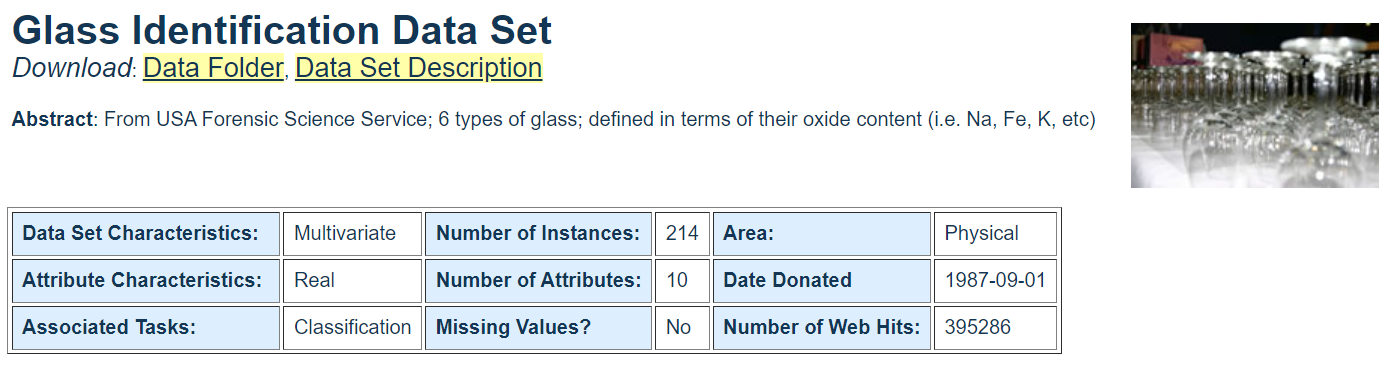

*The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!*


**Attribute Information:**

0. Id number: 1 to 214
1. RI: refractive index
2. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
3. Mg: Magnesium
4. Al: Aluminum
5. Si: Silicon
6. K: Potassium
7. Ca: Calcium
8. Ba: Barium
9. Fe: Iron
10. Type of glass: (class attribute)

from: http://archive.ics.uci.edu/ml/datasets/Glass+Identification

# **Import Libraries**

In [13]:
import pandas as pd
import numpy as np
np.set_printoptions(precision=4)
import seaborn as sns
from matplotlib import pyplot as plt

# **Import Dataset**

In [6]:
import pandas as pd
import numpy as np
X= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/glass.data')
X.rename(columns={"1": 0, "1.52101": 1, "13.64": 2, "4.49": 3, "1.10": 4, "71.78": 5, "0.06": 6, "8.75": 7, "0.00": 8, "0.00.1": 9, "1.1": 10}, inplace=True)
X.describe().round(1)

,0,1,2,3,4,5,6,7,8,9,10
count,213.0,213.0,213.0,213.0,213.0,213.0,213.0,213.0,213.0,213.0,213.0
mean,108.0,1.5,13.4,2.7,1.4,72.7,0.5,9.0,0.2,0.1,2.8
std,61.6,0.0,0.8,1.4,0.5,0.8,0.7,1.4,0.5,0.1,2.1
min,2.0,1.5,10.7,0.0,0.3,69.8,0.0,5.4,0.0,0.0,1.0
25%,55.0,1.5,12.9,2.1,1.2,72.3,0.1,8.2,0.0,0.0,1.0
50%,108.0,1.5,13.3,3.5,1.4,72.8,0.6,8.6,0.0,0.0,2.0
75%,161.0,1.5,13.8,3.6,1.6,73.1,0.6,9.2,0.0,0.1,3.0
max,214.0,1.5,17.4,4.0,3.5,75.4,6.2,16.2,3.2,0.5,7.0


# **Escolha dos centroídes:** 

Com base na descrição a cima foi escolhido 3 centroídes, sendo: 

* Centroíde 1: média dos dados (mean);
* Centroíde 2: valores mínimos (min);
* Centroíde 3: valores máximos (max).

In [7]:
centroide = [[108.0,	1.5,	13.4,	2.7,	1.4,	72.7,	0.5,	9.0,	0.2,	0.1,	2.8],
          [2.0,	1.5,	10.7,	0.0,	0.3,	69.8,	0.0,	5.4,	0.0,	0.0,	1.0],
          [214.0,	1.5,	17.4,	4.0,	3.5,	75.4,	6.2,	16.2,	3.2,	0.5,	7.0]]

# **Distância Euclidiana**

1º passo: Cálculo da distância entre dois pontos

In [8]:
def distancia_euclidiana(X, centroide, numero_centroide):   
    d=[]
    soma=0
    for i in range(len(X)):
        soma=0
        for j in range(len(X.loc[0,:])):
            soma = soma + (X.loc[i,j]-centroide[numero_centroide][j])**2
        d.append(np.sqrt(soma))
    return d

# **Classificação do Centroíde**

2º passo: Distribuição dos pontos nos respectivos centroídes.

O ponto vai pertencer ao centroíde na qual tiver a menor distância.

*d_c1: distância do centroíde 1*

*d_c2: distância do centroíde 2*

*d_c3: distância do centroíde 3*

In [9]:
def class_centroide(d_c1,d_c2,d_c3,d_c4=0):
    v=[]
    if d_c4==0:
        for i in range(len(d_c2)):
            if ((d_c1[i]<d_c2[i])&(d_c1[i]<d_c3[i])):
                v.append('c1')
            if ((d_c2[i]<d_c1[i])&(d_c2[i]<d_c3[i])):
                v.append('c2')
            if ((d_c3[i]<d_c2[i])&(d_c3[i]<d_c1[i])):
                v.append('c3')
    if d_c4!=0:
        for i in range(len(d_c2)):
            if ((d_c1[i]<d_c2[i])&(d_c1[i]<d_c3[i])&(d_c1[i]<d_c4[i])):
                v.append('c1')
            if ((d_c2[i]<d_c1[i])&(d_c2[i]<d_c3[i])&(d_c2[i]<d_c4[i])):
                v.append('c2')
            if ((d_c3[i]<d_c2[i])&(d_c3[i]<d_c1[i])&(d_c3[i]<d_c4[i])):
                v.append('c3')
            if ((d_c4[i]<d_c1[i])&(d_c4[i]<d_c2[i])&(d_c4[i]<d_c3[i])):
                v.append('c4')            
    return v

 # **Novo Centroíde**

 **3º passo:** O centroíde é movido para a posição média dos seus respectivos pontos. 

In [10]:
def novo_centroide(indices_c):   
    soma=0
    c_novo=[]
    for j in range(X.shape[1]):
        soma=0
        for i in indices_c:
            soma=soma+X.iloc[i,j]
        x_centro=soma/len(indices_c)
        x_centro=round(x_centro,2)
        c_novo.append(x_centro)
    return c_novo

# Iterações

Processo é repetido até que a convergência tenha sido alcançada ou o máx número de iterações

In [11]:
# 1º passo: Cálculo da distância entre ponto e os centroídes
d_c1 = distancia_euclidiana(X, centroide, 0)
d_c2 = distancia_euclidiana(X, centroide, 1)
d_c3 = distancia_euclidiana(X,centroide, 2)

# 2º passo: Distribuição dos pontos nos respectivos centroídes
cluster = class_centroide(d_c1,d_c2,d_c3)
cluster

# 3º passo: O centroíde é movido para a posição média dos seus respectivos pontos. 
indices_c1 = [i for i, j in enumerate(cluster) if j == 'c1']
indices_c2 = [i for i, j in enumerate(cluster) if j == 'c2']
indices_c3 = [i for i, j in enumerate(cluster) if j == 'c3']

centro1=novo_centroide(indices_c1)
centro2=novo_centroide(indices_c2)
centro3=novo_centroide(indices_c3)

centroide2=[centro1,centro2,centro3]

#Processo é repetido até que a convergência dos pontos centrais tenha sido alcançada

iteration= 1
for i in range(250): 
    
    # 1º passo:
    d_c1 = distancia_euclidiana(X, centroide2, 0)   
    d_c2 = distancia_euclidiana(X, centroide2, 1)
    d_c3 = distancia_euclidiana(X, centroide2, 2)

    # 2º passo:
    cluster = class_centroide(d_c1,d_c2,d_c3)

    # 3º passo::
    indices_c1 = [i for i, j in enumerate(cluster) if j == 'c1']
    indices_c2 = [i for i, j in enumerate(cluster) if j == 'c2']
    indices_c3 = [i for i, j in enumerate(cluster) if j == 'c3']

    centroide=centroide2

    centro1=novo_centroide(indices_c1)
    centro2=novo_centroide(indices_c2)
    centro3=novo_centroide(indices_c3)

    centroide2 =[centro1,centro2,centro3]
    iteration=iteration+1
    
print('Centroides:')
for i in centroide2:
    print(i, '\n')
print('Números de Iterações:',iteration,'\n')

Centroides:
[108.5, 1.52, 13.09, 2.97, 1.41, 72.61, 0.52, 9.12, 0.05, 0.07, 2.0] 

[37.0, 1.52, 13.27, 3.55, 1.17, 72.61, 0.45, 8.77, 0.01, 0.06, 1.03] 

[179.5, 1.52, 13.88, 1.49, 1.76, 72.74, 0.52, 8.98, 0.47, 0.04, 5.39] 

Números de Iterações: 251 



 # **Gráfico**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


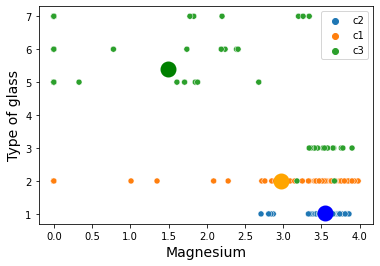

In [40]:
# "Magnesium": coluna 3 x "Type of glass": coluna 10
plt.xlabel("Magnesium", fontsize=14)
plt.ylabel("Type of glass", fontsize=14)
sns.scatterplot(X.loc[:,3],X.loc[:,10],hue=cluster)

#Plot centers
plt.scatter(centroide2[0][3],centroide2[0][10],  marker="o", color= 'orange', s=120, linewidths=5)
plt.scatter(centroide2[1][3],centroide2[1][10], marker="o", color= 'blue', s=120, linewidths=5)
plt.scatter(centroide2[2][3],centroide2[2][10], marker="o", color= 'green', s=120, linewidths=5);